<a href="https://colab.research.google.com/github/BigDataEngineer09/BigDataEngineer09/blob/main/G2M_Cab_Firm_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import string
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!ls '/content/drive/My Drive/'

In [ ]:
df_cab= pd.read_csv('/content/drive/My Drive/Dataset/G2M Cab_DataSets/Cab_Data.csv')
df_city= pd.read_csv('/content/drive/My Drive/Dataset/G2M Cab_DataSets/City.csv')
df_customer= pd.read_csv('/content/drive/My Drive/Dataset/G2M Cab_DataSets/Customer_ID.csv')
df_transaction= pd.read_csv('/content/drive/My Drive/Dataset/G2M Cab_DataSets/Transaction_ID.csv')

# Undrestanding the data

**Cab Data:** this file includes details of transaction for 2 cab companies 'Pink Cab' and 'Yellow Cab'

``Transaction ID:-``

``Date of Travel:-``    
``Company:-      ``   
``City:-``             
``KM Travelled:- ``   
``Price Charged:-``   
``Cost of Trip:- ``


In [ ]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [ ]:
print(df_cab.shape)
df_cab.sample(5)

(359392, 7)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
135441,10166514,42846,Yellow Cab,SAN DIEGO CA,41.40,832.13,536.5440
201012,10246751,43031,Yellow Cab,LOS ANGELES CA,26.78,392.00,347.0688
137002,10168500,42853,Yellow Cab,NEW YORK NY,21.28,565.45,280.8960
34958,10044182,42533,Yellow Cab,NEW YORK NY,29.50,890.24,364.6200
215582,10264006,43063,Yellow Cab,MIAMI FL,33.60,527.07,443.5200


In [ ]:
df_city.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [ ]:
df_city.sample(3)

,City,Population,Users
6,SAN DIEGO CA,"959,307","69,995"
8,DALLAS TX,"942,908","22,157"
5,ORANGE COUNTY,"1,030,185","12,994"


In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
df_customer.sample(3)

,Customer ID,Gender,Age,Income (USD/Month)
25369,36432,Female,28,3919
37077,56035,Male,34,21755
43809,48271,Female,52,3392


In [ ]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [ ]:
df_transaction.sample(3)

,Transaction ID,Customer ID,Payment_Mode
29529,10029540,53203,Cash
208140,10208151,44763,Cash
400167,10400178,19796,Card


In [ ]:
df_transaction.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,440098.0,1.022006e+07,127045.493722,10000011.0,10110035.25,10220059.5,10330083.75,10440108.0
Customer ID,440098.0,2.361951e+04,21195.549816,1.0,3530.00,15168.0,43884.00,60000.0


In [ ]:
print(f" Null values in Cab data: {df_cab.isnull().sum().sum()}")
print(f" \n Null values in City data: {df_city.isnull().sum().sum()}")
print(f" \n Null values in Customer data: {df_customer.isnull().sum().sum()}")
print(f" \n Null values in Transaction data: {df_transaction.isnull().sum().sum()}")

 Null values in Cab data: 0
 
 Null values in City data: 0
 
 Null values in Customer data: 0
 
 Null values in Transaction data: 0


Missing Values

In [ ]:
df_cab.describe(include='all')

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392,359392,359392.000000,359392.000000,359392.000000
unique,NaN,NaN,2,19,NaN,NaN,NaN
top,NaN,NaN,Yellow Cab,NEW YORK NY,NaN,NaN,NaN
freq,NaN,NaN,274681,99885,NaN,NaN,NaN
mean,1.022076e+07,42964.067998,NaN,NaN,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,NaN,NaN,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,NaN,NaN,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,NaN,NaN,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,NaN,NaN,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,NaN,NaN,32.960000,583.660000,413.683200


In [ ]:
print(f" Missing values in Cab data: {df_cab.isna().any().any()}")
print(f" \n Missing values in City data: {df_city.isna().any().any()}")
print(f" \n Missing values in Customer data: {df_customer.isna().any().any()}")
print(f" \n Missing values in Transaction data: {df_transaction.isna().any().any()}")

 Missing values in Cab data: False
 
 Missing values in City data: False
 
 Missing values in Customer data: False
 
 Missing values in Transaction data: False


**Duplicate records**

In [ ]:
print(f" Duplicate records in Cab data: {df_cab.duplicated().sum()}")
print(f" \n Duplicate recordss in City data: {df_city.duplicated().sum()}")
print(f" \n Duplicate records in Customer data: {df_customer.duplicated().sum()}")
print(f" \n Duplicate records in Transaction data: {df_transaction.duplicated().sum()}")

 Duplicate records in Cab data: 0
 
 Duplicate recordss in City data: 0
 
 Duplicate records in Customer data: 0
 
 Duplicate records in Transaction data: 0


# Data Preprocessing

**Rename columns in all dataframes**

In [ ]:
dataframes=[df_cab,df_customer,df_transaction]
for df in dataframes:
  for col in df.columns:
    if ' ' in col:
      df.rename(columns={col: col.replace(' ', '_')}, inplace=True)

In [ ]:
df_customer.tail()

,Customer_ID,Gender,Age,Income_(USD/Month)
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454
49170,39761,Female,32,10128


In [ ]:
df_transaction.sample(5)

,Transaction_ID,Customer_ID,Payment_Mode
217783,10217794,43966,Card
285916,10285927,4701,Card
249611,10249622,44802,Cash
430180,10430191,5558,Card
385166,10385177,18061,Cash


# Cab Data

In [ ]:
df_cab.tail()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


**``Note``** that the **``Date_of_Travel``** column contains date  in Excel numberical format. We know that the given dataset period ranges from 31/01/2016 to 31/12/2018. Hence we conver the serial number into date format and store it in a new colum called **``Trave_Date``**


In [ ]:
# Serial number to date format
import xlrd
def serial_to_date(serial_number):
  datetime_date = xlrd.xldate_as_datetime(serial_number, 0)
  return datetime_date.date()

In [ ]:

df_cab["Travel_Date"] = df_cab["Date_of_Travel"].apply(serial_to_date)


In [ ]:
df_cab["Travel_Date"] = df_cab["Travel_Date"].astype('datetime64[ms]')


In [ ]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction_ID  359392 non-null  int64         
 1   Date_of_Travel  359392 non-null  int64         
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM_Travelled    359392 non-null  float64       
 5   Price_Charged   359392 non-null  float64       
 6   Cost_of_Trip    359392 non-null  float64       
 7   Travel_Date     359392 non-null  datetime64[ms]
dtypes: datetime64[ms](1), float64(3), int64(2), object(2)
memory usage: 21.9+ MB


In [ ]:
# Extract year, month, day using datetime methods
df_cab['Year'] = df_cab['Travel_Date'].dt.year
df_cab['Month'] = df_cab['Travel_Date'].dt.month
df_cab['Day'] = df_cab['Travel_Date'].dt.day
df_cab['day_of_week'] = df_cab['Travel_Date'].dt.dayofweek
df_cab['day_of_week_name'] = df_cab['Travel_Date'].dt.day_name()

In [ ]:
df_cab.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Travel_Date,Year,Month,Day,day_of_week,day_of_week_name
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-08,2016,1,8,4,Friday
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-06,2016,1,6,2,Wednesday
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-02,2016,1,2,5,Saturday
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-07,2016,1,7,3,Thursday
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-03,2016,1,3,6,Sunday


# Customer Data

In [ ]:
df_customer.head()

,Customer_ID,Gender,Age,Income_(USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [ ]:
df_customer.rename(columns={"Income_(USD/Month)": "Income"}, inplace=True)

In [ ]:
df_customer.head()

,Customer_ID,Gender,Age,Income
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


# Transaction Data

In [ ]:
df_transaction.head()

,Transaction_ID,Customer_ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


# City data


In [ ]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [ ]:
def preprocess_text(text):
    # Remove punctuation
    no_punctuation = ''.join([char for char in text if char not in string.punctuation])
    return no_punctuation

In [ ]:
df_city['Population']=df_city['Population'].apply(preprocess_text)
df_city['Users']=df_city['Users'].apply(preprocess_text)

In [ ]:
df_city.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [ ]:
len(df_city['City'].unique())

20

# EDA

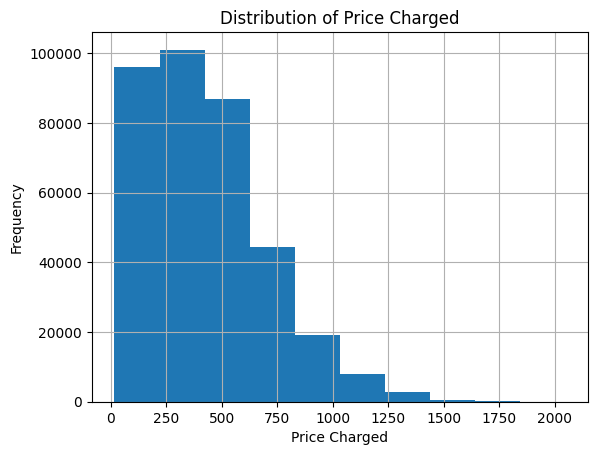

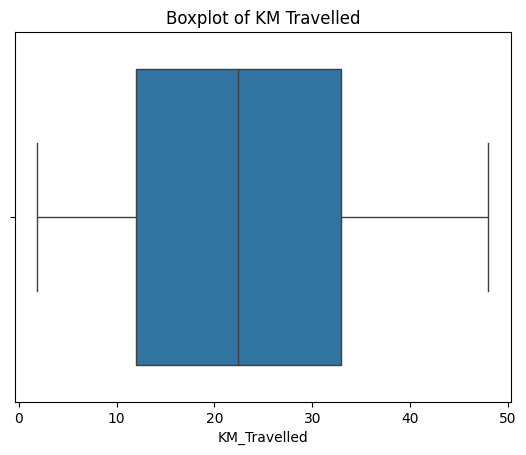

In [ ]:
# Histogram for 'Price Charged'
df_cab['Price_Charged'].hist()
plt.xlabel('Price Charged')
plt.ylabel('Frequency')
plt.title('Distribution of Price Charged')
plt.show()

# Box plot for 'KM Travelled'
sns.boxplot(x='KM_Travelled', data=df_cab)
plt.title('Boxplot of KM Travelled')
plt.show()


In [ ]:
'''Scatter plot between 'KM Travelled' and 'Price Charged'
plt.scatter(df_cab['KM_Travelled'], df_cab['Price_Charged'])
plt.xlabel('KM Travelled')
plt.ylabel('Price Charged')
plt.title('Scatter Plot: KM Travelled vs Price Charged')
plt.show()

# Pair plot for numerical variables
sns.pairplot(df_cab)
plt.show()

# Heatmap for correlation analysis
sns.heatmap(df_cab.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
'''

"Scatter plot between 'KM Travelled' and 'Price Charged'\nplt.scatter(df_cab['KM_Travelled'], df_cab['Price_Charged'])\nplt.xlabel('KM Travelled')\nplt.ylabel('Price Charged')\nplt.title('Scatter Plot: KM Travelled vs Price Charged')\nplt.show()\n\n# Pair plot for numerical variables\nsns.pairplot(df_cab)\nplt.show()\n\n# Heatmap for correlation analysis\nsns.heatmap(df_cab.corr(), annot=True, cmap='coolwarm')\nplt.title('Correlation Heatmap')\nplt.show()\n"

<ipython-input-136-57df9f1a240b>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)
<ipython-input-136-57df9f1a240b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=15)


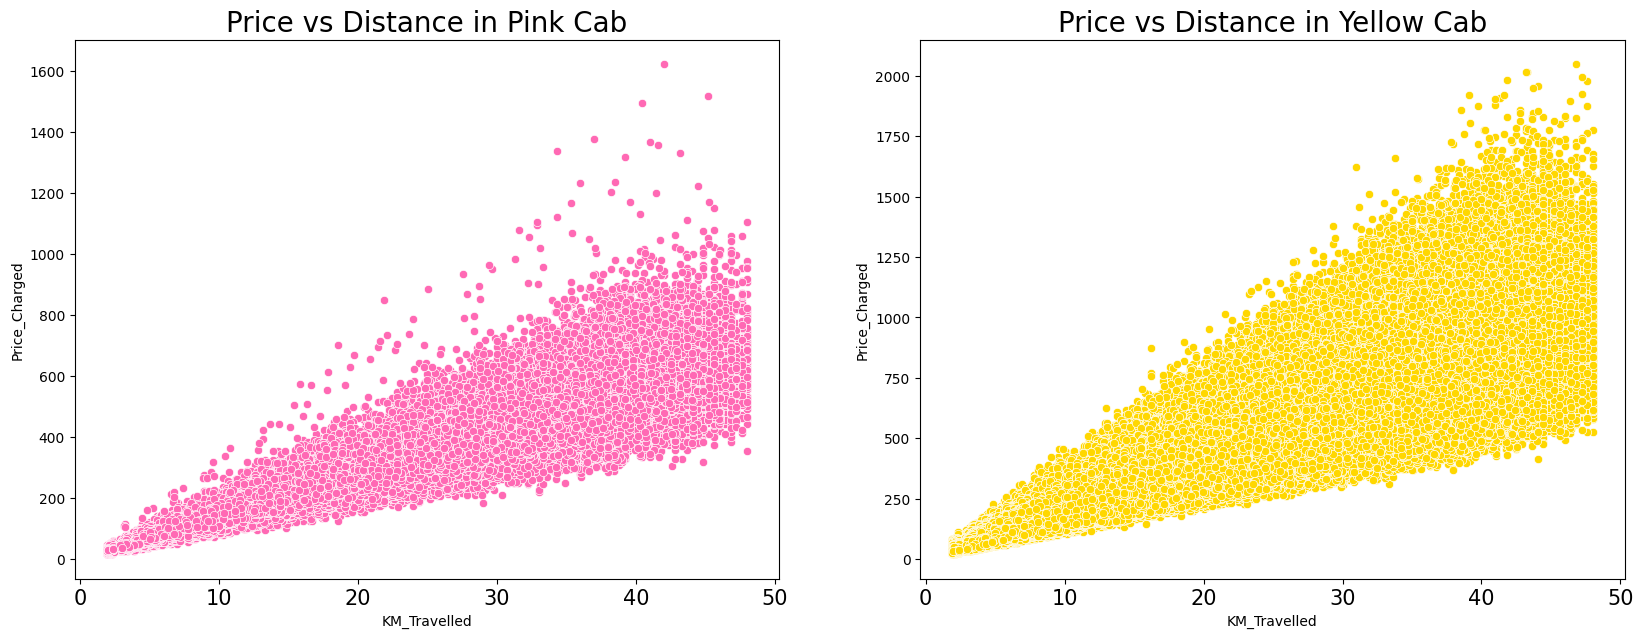

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))
PinkCab_df = df_cab[df_cab['Company']=='Pink Cab']
YellowCab_df = df_cab[df_cab['Company']=='Yellow Cab']

sns.scatterplot(data=PinkCab_df, x='KM_Travelled', y='Price_Charged',color='hotpink', ax=ax1)
ax1.set_title('Price vs Distance in Pink Cab', fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)

sns.scatterplot(data=YellowCab_df, x='KM_Travelled', y='Price_Charged',color='gold', ax=ax2)
ax2.set_title('Price vs Distance in Yellow Cab', fontsize=20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=15)

plt.show()


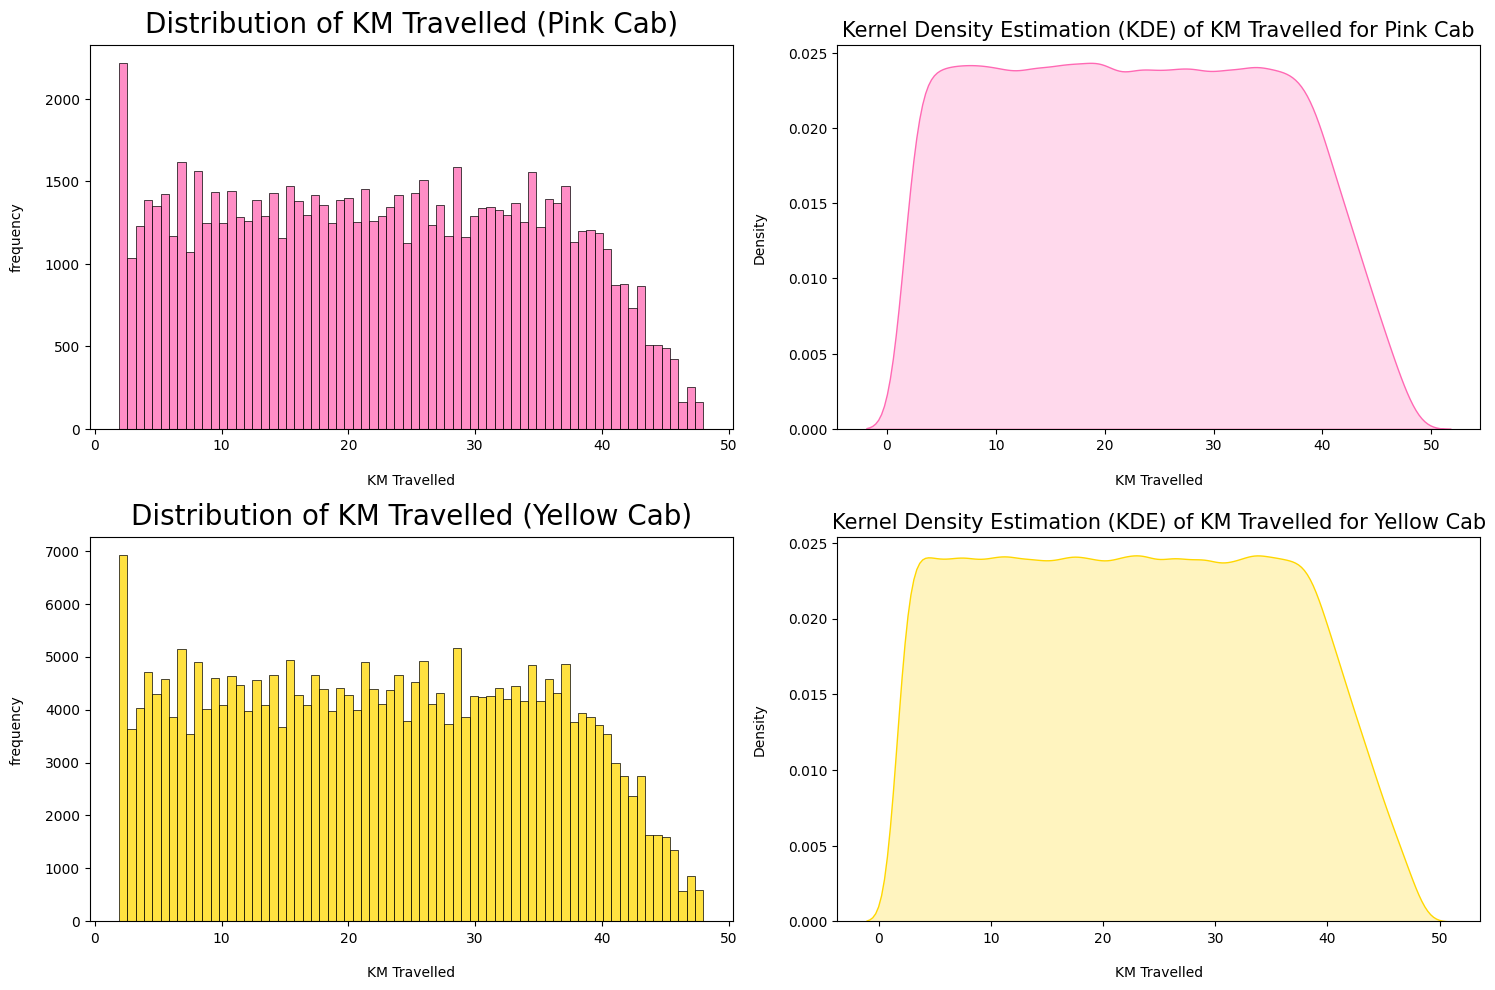

In [ ]:
# Distribution and KDE plot for distribution of 'KM Travelled' for Pink Cab
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Distribution plot for Pink Cab
sns.histplot(PinkCab_df['KM_Travelled'], kde=False, color='hotpink', bins=70, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of KM Travelled (Pink Cab)", fontsize=20, y=1.012)
axes[0, 0].set_xlabel("KM Travelled", labelpad=15)
axes[0, 0].set_ylabel("frequency", labelpad=15)

# KDE plot for Pink Cab
sns.kdeplot(PinkCab_df['KM_Travelled'], shade=True, color='hotpink', ax=axes[0, 1])
axes[0, 1].set_xlabel('KM Travelled', labelpad=15)
axes[0, 1].set_ylabel('Density', labelpad=15)
axes[0, 1].set_title('Kernel Density Estimation (KDE) of KM Travelled for Pink Cab', fontsize=15)

# Distribution and KDE plot for distribution of 'KM Travelled' for Yellow Cab
sns.histplot(YellowCab_df['KM_Travelled'], kde=False, color='gold', bins=70, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of KM Travelled (Yellow Cab)", fontsize=20, y=1.012)
axes[1, 0].set_xlabel("KM Travelled", labelpad=15)
axes[1, 0].set_ylabel("frequency", labelpad=15)

# KDE plot for Yellow Cab
sns.kdeplot(YellowCab_df['KM_Travelled'], shade=True, color='gold', ax=axes[1, 1])
axes[1, 1].set_xlabel('KM Travelled', labelpad=15)
axes[1, 1].set_ylabel('Density', labelpad=15)
axes[1, 1].set_title('Kernel Density Estimation (KDE) of KM Travelled for Yellow Cab', fontsize=15)

plt.tight_layout()
plt.show()


**Outliers**

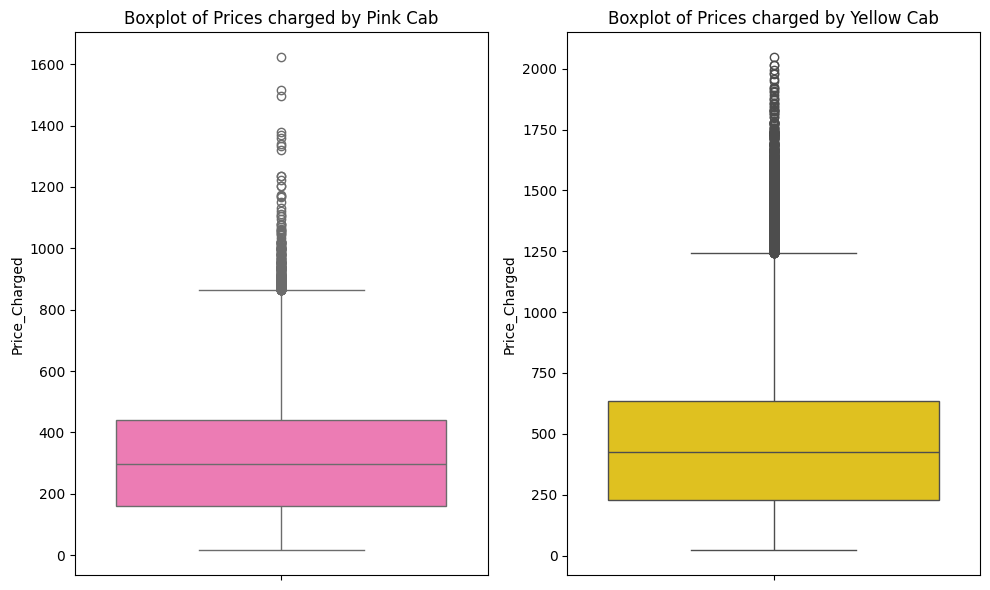

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)

# Boxplot for Pink Cab
sns.boxplot(y='Price_Charged', data=PinkCab_df, color='hotpink')
plt.title('Boxplot of Prices charged by Pink Cab')

plt.subplot(1, 2, 2)

# Boxplot for Yellow Cab
sns.boxplot(y='Price_Charged', data=YellowCab_df, color='gold')
plt.title('Boxplot of Prices charged by Yellow Cab')

plt.tight_layout()
plt.show()

as we can see for pink cab the prices ranges from 200 - 400 dollors and there are many outliers

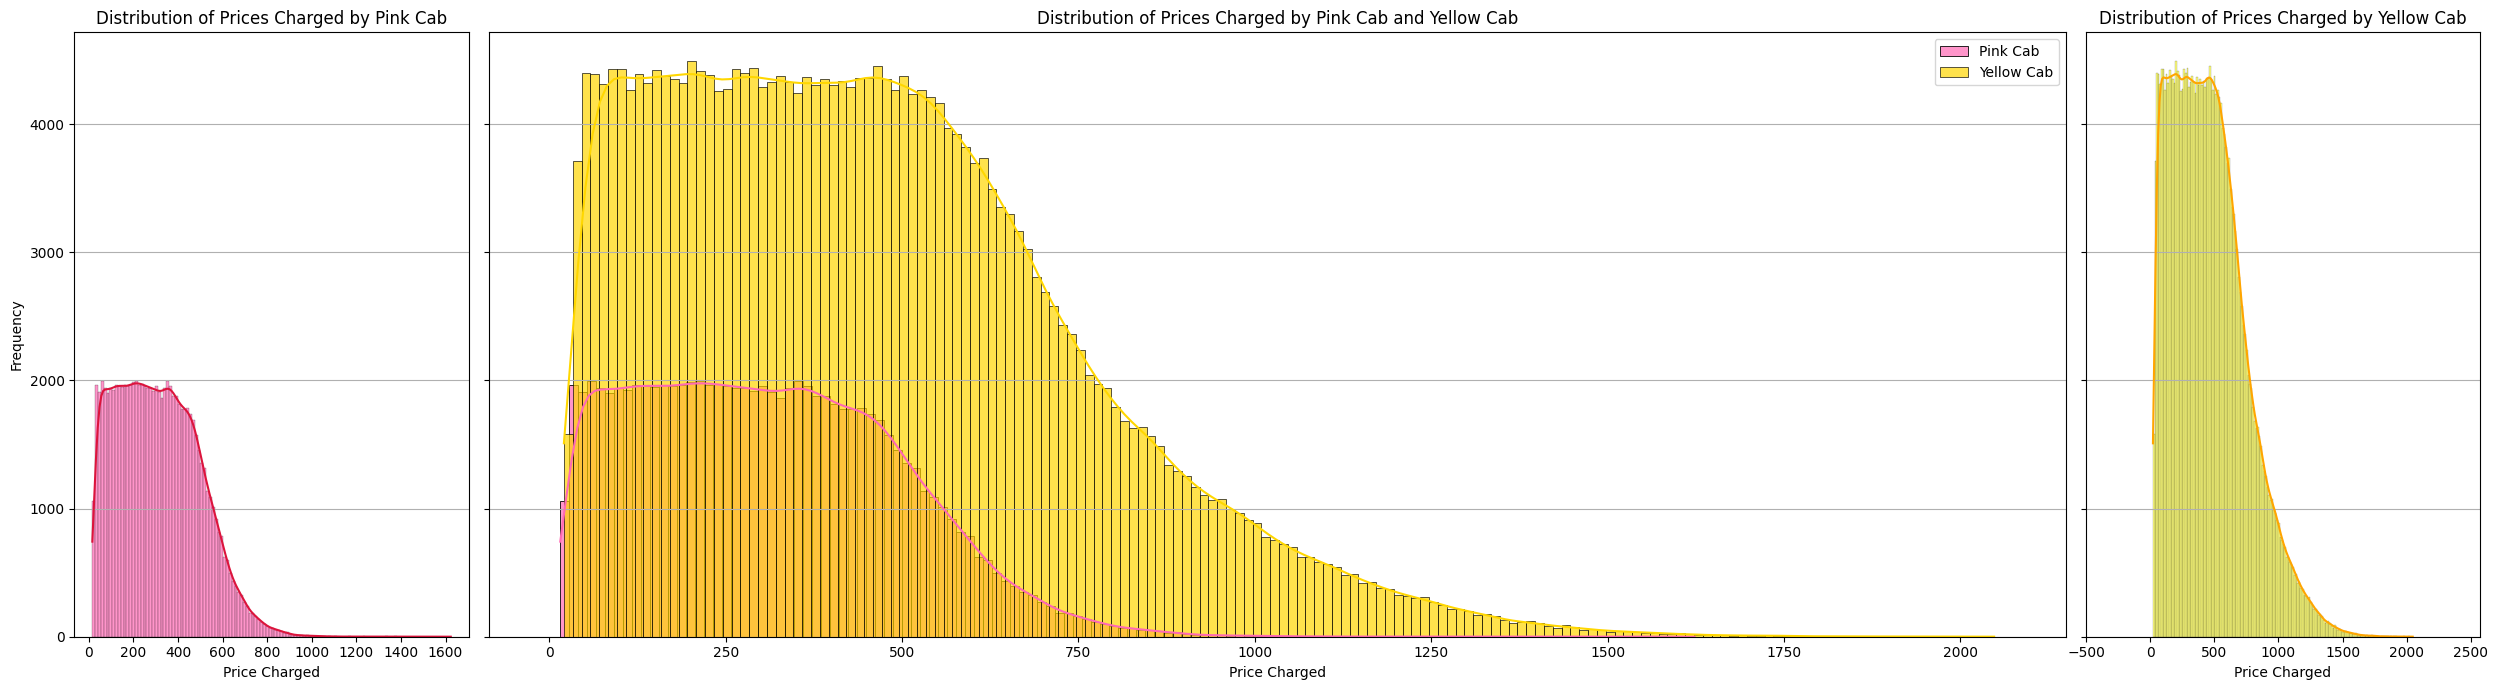

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 7), sharey=True, gridspec_kw={'width_ratios': [1, 4, 1]})

# Distribution plot for Pink Cab
sns.histplot(PinkCab_df['Price_Charged'], kde=True, color='hotpink', label='Pink Cab', ax=axes[0],alpha=0.7)
axes[0].lines[0].set_color('crimson')
axes[0].set_xlabel('Price Charged')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y')
axes[0].set_title('Distribution of Prices Charged by Pink Cab')

# Common center plot
sns.histplot(PinkCab_df['Price_Charged'], kde=True, color='hotpink', label='Pink Cab', ax=axes[1], alpha=0.7)
sns.histplot(YellowCab_df['Price_Charged'], kde=True, color='gold', label='Yellow Cab', ax=axes[1], alpha=0.7)
axes[1].set_xlabel('Price Charged')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Prices Charged by Pink Cab and Yellow Cab')
axes[1].grid(axis='y')
axes[1].legend()

# Distribution plot for Yellow Cab
sns.histplot(YellowCab_df['Price_Charged'], kde=True, color='yellow', label='Yellow Cab', ax=axes[2])#
axes[2].lines[0].set_color('orange')
axes[2].set_xlabel('Price Charged')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Prices Charged by Yellow Cab')
plt.grid(axis='y')
plt.axis('equal')
plt.tight_layout()
plt.show()


**Cost of the trip**

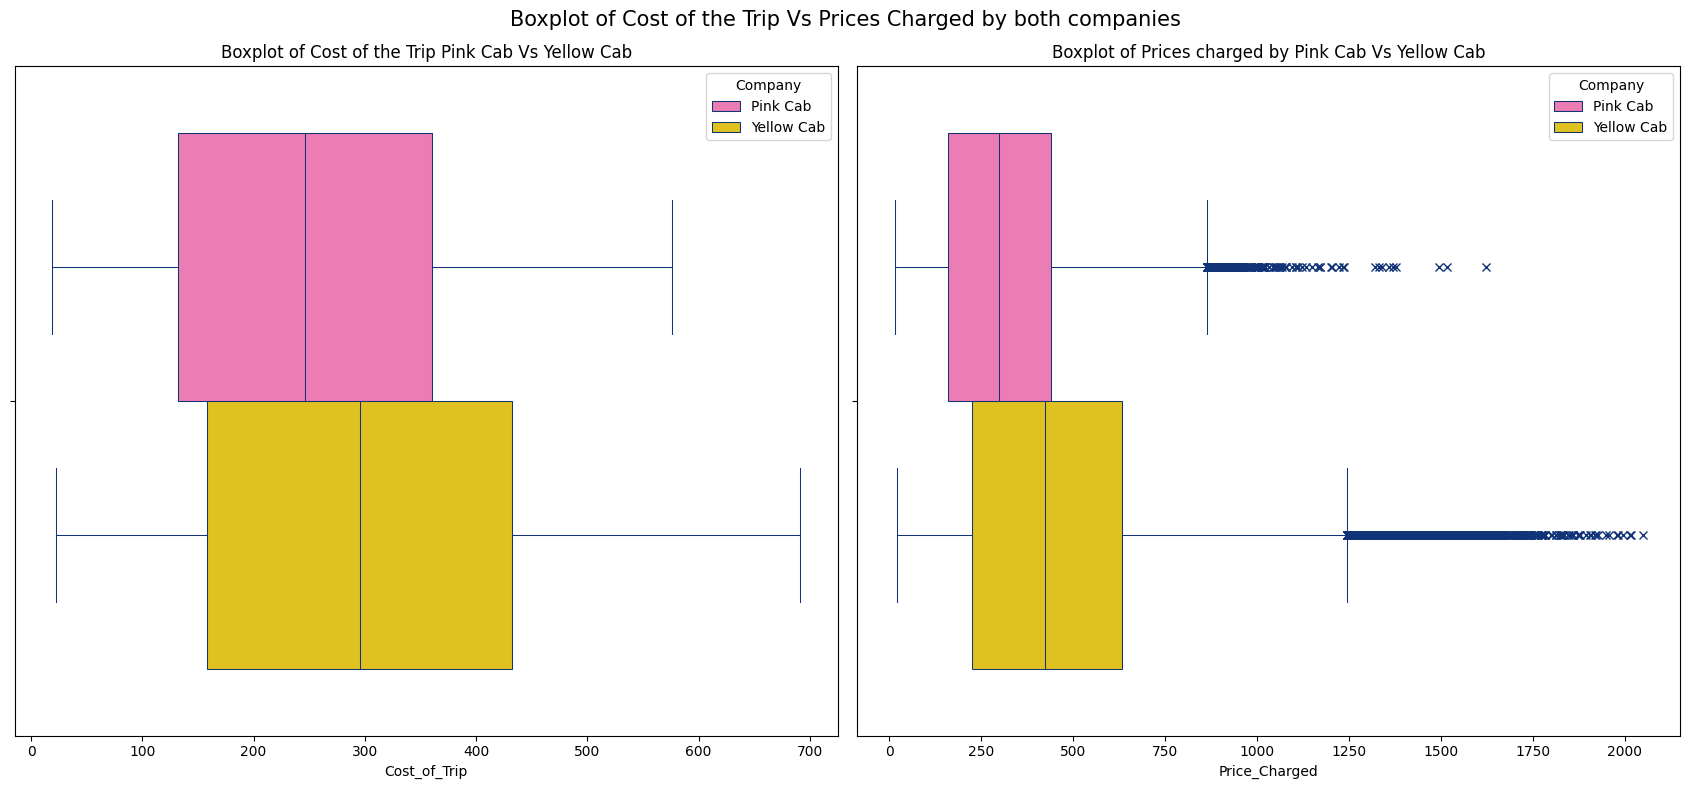

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(17, 8))
palletes=['hotpink','gold']
fig.suptitle('Boxplot of Cost of the Trip Vs Prices Charged by both companies', fontsize=15)
sns.boxplot(data=df_cab, x="Cost_of_Trip", hue="Company",palette=palletes,ax=axes[0],linecolor="#137", linewidth=.75,flierprops={"marker": "x"})
axes[0].set_title('Boxplot of Cost of the Trip Pink Cab Vs Yellow Cab')
sns.boxplot(data=df_cab, x="Price_Charged", hue="Company",palette=palletes,ax=axes[1],linecolor="#137", linewidth=.75,flierprops={"marker": "x"})
axes[1].set_title('Boxplot of Prices charged by Pink Cab Vs Yellow Cab')
plt.tight_layout()
plt.show()

# Merge the data

In [ ]:
df_cab.shape

(359392, 13)

In [ ]:
df_customer.shape

(49171, 4)

In [ ]:
df_transaction.shape
print(f" Count of Unique Transaction ID records in Cab data: {df_cab.duplicated().sum()}")

 Count of Unique Transaction ID records in Cab data: 0


In [ ]:
len(df_transaction['Transaction_ID'].unique())

440098

In [ ]:
df_city.shape

(20, 3)

In [ ]:
# Assuming Transaction_ID is the unique identifier across datasets
merged_df = pd.merge(left=df_cab, right=df_transaction, on='Transaction_ID', how='inner')

# Next merge with Customer_ID based on Customer_ID in transaction_id
merged_df = pd.merge(left=merged_df, right=df_customer, on='Customer_ID', how='inner')

# Finally, merge with City based on City in Cab_Data (assuming City refers to the city of travel)
merged_df = pd.merge(left=merged_df, right=df_city, left_on='City', right_on='City', how='inner')



In [ ]:
merged_df.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Travel_Date,Year,Month,Day,day_of_week,day_of_week_name,Customer_ID,Payment_Mode,Gender,Age
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,2016,1,8,4,Friday,29290,Card,Male,28
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-21,2018,7,21,5,Saturday,29290,Cash,Male,28
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-23,2018,11,23,4,Friday,29290,Card,Male,28
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,2016,1,6,2,Wednesday,27703,Card,Male,27
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-21,2018,4,21,5,Saturday,27703,Card,Male,27


In [ ]:
merged_df = merged_df.drop(['Population','Income','Users','Date_of_Travel'], axis=1)

In [ ]:
print(f" Null values in Cab data: {merged_df.isnull().sum().sum()}")

 Null values in Cab data: 0


In [ ]:
print(f" Duplicate records in Cab data: {merged_df.duplicated().sum()}")

 Duplicate records in Cab data: 0


In [ ]:
print(f" Missing values in Cab data: {merged_df.isna().any().any()}")

 Missing values in Cab data: False


# Numerical Features

In [ ]:
numerical_variables = [feature for feature in merged_df.columns if merged_df[feature].dtypes!='O']
print('Number of numberical variables:', len(numerical_variables))

merged_df[numerical_variables].sample(1)

Number of numberical variables: 11


,Transaction_ID,KM_Travelled,Price_Charged,Cost_of_Trip,Travel_Date,Year,Month,Day,day_of_week,Customer_ID,Age
204588,10012739,43.29,691.01,519.48,2016-03-02,2016,3,2,2,1126,18


In [ ]:
categorial_variables = [feature for feature in merged_df.columns if merged_df[feature].dtypes=='O']
print('Number of categorial variables:', len(categorial_variables))

merged_df[categorial_variables].sample(1)

Number of categorial variables: 5


,Company,City,day_of_week_name,Payment_Mode,Gender
338974,Yellow Cab,WASHINGTON DC,Thursday,Card,Male


**6. Distribuition of numerical features**

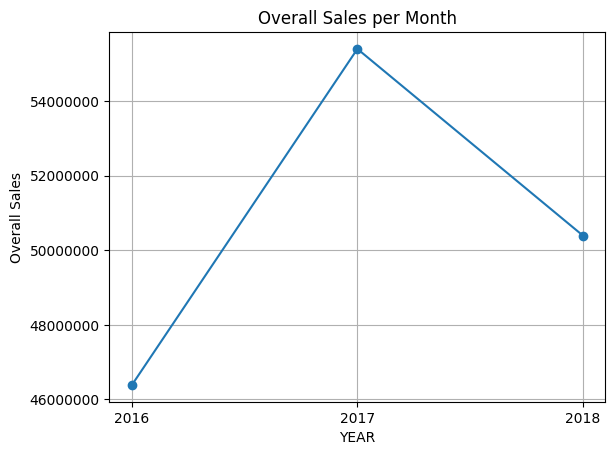

In [ ]:
Overall_sales_per_month= merged_df.groupby('Year')['Price_Charged'].sum()
Overall_sales_per_month.plot(kind='line', marker='o', linestyle='-')
plt.xlabel('YEAR')
plt.ylabel('Overall Sales')
plt.xticks([2016, 2017, 2018])
plt.gca().ticklabel_format(style='plain', useOffset=False)
plt.title('Overall Sales per Month')
plt.grid(True)
plt.show()

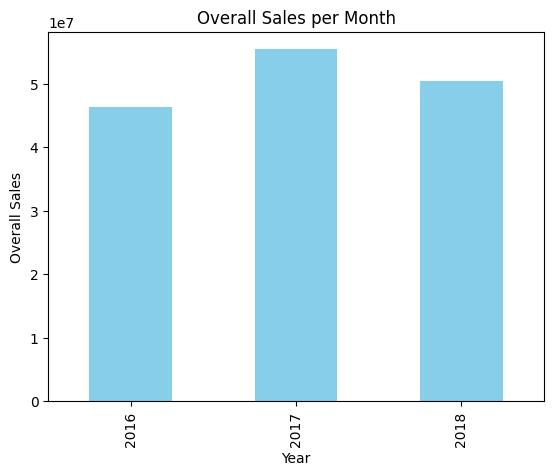

In [ ]:

overall_sales_per_month = merged_df.groupby('Year')['Price_Charged'].sum()

# Plotting as a bar plot
overall_sales_per_month.plot(kind='bar', color='skyblue')

plt.xlabel('Year')
plt.ylabel('Overall Sales')
plt.title('Overall Sales per Month')
plt.show()


In [ ]:
sales_by_year_month = merged_df.groupby(['Year', 'Month'])['Price_Charged'].sum().reset_index()

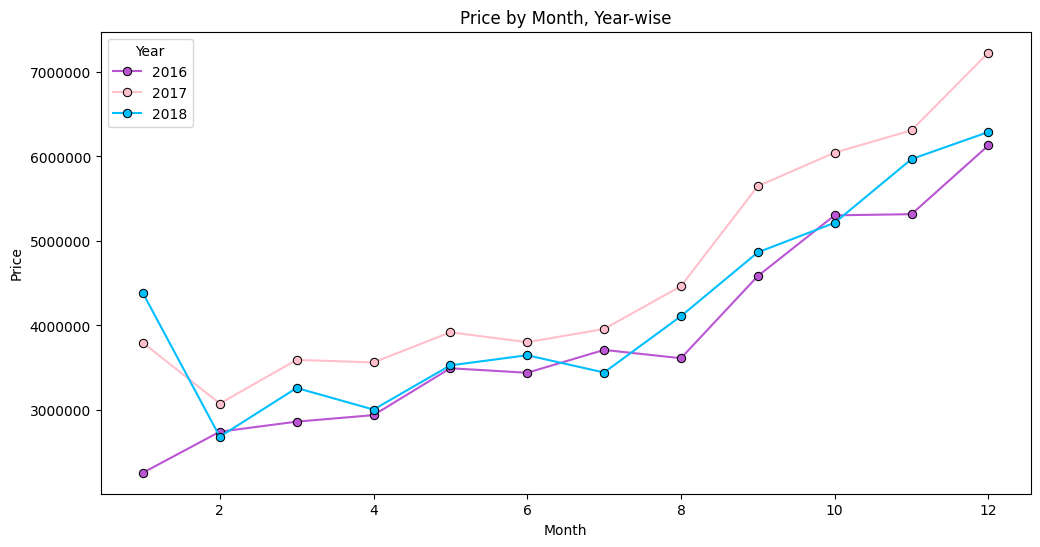

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
palettes=['mediumorchid','pink','deepskyblue']
sns.lineplot(data=sales_by_year_month, x='Month', y='Price_Charged', hue='Year', marker='o',markeredgecolor='black',palette=palettes, ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Price')
ax.set_title('Price by Month, Year-wise')
ax.ticklabel_format(axis='y', style='plain', useOffset=False)
ax.legend(title='Year')

In [ ]:
PinkCab = merged_df[merged_df['Company']=='Pink Cab']
YellowCab = merged_df[merged_df['Company']=='Yellow Cab']

In [ ]:
Pink_Cab_sales_by_year_month = PinkCab.groupby(['Year', 'Month'])['Price_Charged'].sum().reset_index()

In [ ]:
Yellow_Cab_sales_by_year_month = YellowCab.groupby(['Year', 'Month'])['Price_Charged'].sum().reset_index()

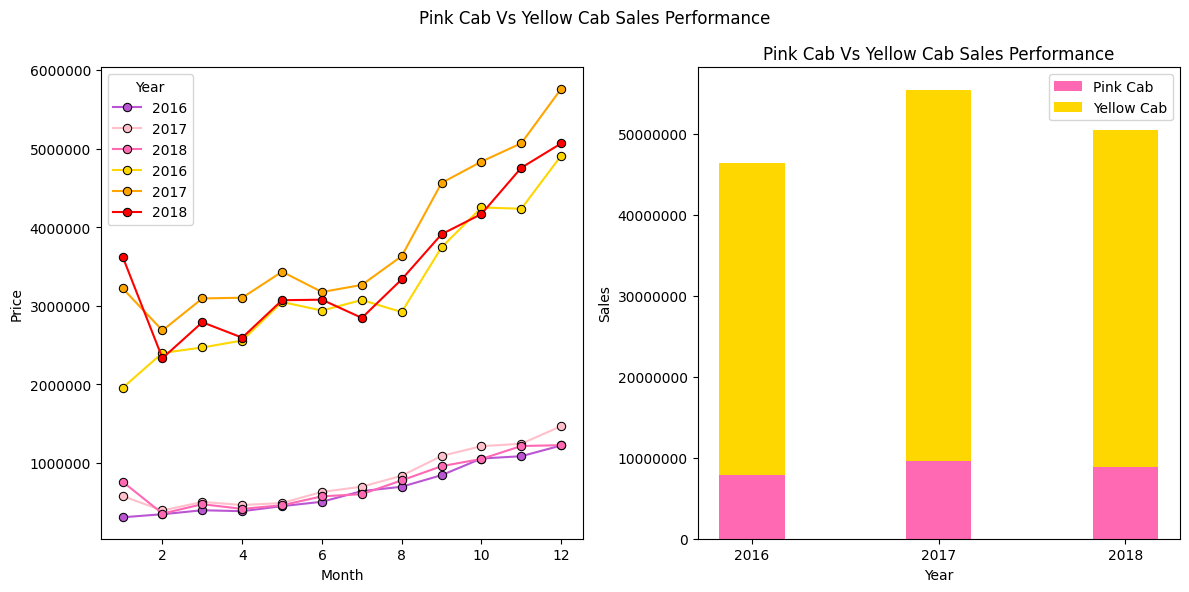

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Pink Cab Vs Yellow Cab Sales Performance')

pink_palettes = ['mediumorchid', 'pink', 'hotpink']
yellow_palettes = ['gold', 'orange', 'red']

# Pink Cab Line Plot
sns.lineplot(data=Pink_Cab_sales_by_year_month, x='Month', y='Price_Charged', hue='Year', marker='o', markeredgecolor='black', palette=pink_palettes, ax=axes[0])
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Price')
#axes[0].set_title('Pink Cab Sales, Year-wise')
axes[0].ticklabel_format(axis='y', style='plain', useOffset=False)
axes[0].legend(title='Year')

# Yellow Cab Line Plot
sns.lineplot(data=Yellow_Cab_sales_by_year_month, x='Month', y='Price_Charged', hue='Year', marker='o', markeredgecolor='black', palette=yellow_palettes, ax=axes[0])
axes[0].legend(title='Year')

# Stacked Bar Plot
years = sorted(Pink_Cab_sales_by_year_month['Year'].unique())

# Extracting Pink Cab and Yellow Cab sales for each year
pink_sales = []
yellow_sales = []
for year in years:
    pink_sales.append(Pink_Cab_sales_by_year_month[Pink_Cab_sales_by_year_month['Year'] == year]['Price_Charged'].sum())
    yellow_sales.append(Yellow_Cab_sales_by_year_month[Yellow_Cab_sales_by_year_month['Year'] == year]['Price_Charged'].sum())

index = np.arange(len(years))
bar_width = 0.35

pink_bar = axes[1].bar(index, pink_sales, bar_width, label='Pink Cab', color='hotpink')
yellow_bar = axes[1].bar(index, yellow_sales, bar_width, label='Yellow Cab', color='gold', bottom=pink_sales)

axes[1].set_xlabel('Year')
axes[1].set_ylabel('Sales')
#axes[1].set_title('Pink Cab Vs Yellow Cab Sales Performance')
axes[1].set_xticks(index)
axes[1].set_xticklabels(years)
axes[1].ticklabel_format(axis='y', style='plain', useOffset=False)
axes[1].legend()
plt.title('Pink Cab Vs Yellow Cab Sales Performance')
plt.tight_layout()
plt.show()


# **Relationships across Files**
**Cab_Data.csv** links to Transaction_ID.csv via a transaction ID.

**Transaction_ID.csv** links to Customer_ID.csv via a customer ID.

**Customer_ID.csv** links to City.csv via a City field